In [1]:
import os 

### Find Best Params

First find the best params

In [61]:
def file_read_from_tail(fname,lines):
        fname = fname
        bufsize = 8192
        fsize = os.stat(fname).st_size
        iter = 0
        with open(fname) as f:
                if bufsize > fsize:
                        bufsize = fsize-1
                        data = []
                        while True:
                                iter +=1
                                f.seek(fsize-bufsize*iter)
                                data.extend(f.readlines())
                                if len(data) >= lines or f.tell() == 0:
                                        return data[-lines:]


In [62]:
def parse_mse(line):
    mse = float(line.strip()[4:])
    return mse

In [63]:
from statistics import mean, stdev

def aggregateParams(experiment_dir):
    files = os.listdir(experiment_dir)
    
    mse_to_params = {}
    params_to_mse = {}
    
    # aggregate mse
    for f in files:
        key = f[:-6]
        d = file_read_from_tail(experiment_dir + f,3)
        if d == None:
            continue
        mse = parse_mse(d[0])
        
        if key not in params_to_mse:
            params_to_mse[key] = []
        
        params_to_mse[key].append(mse)
                
    # flip and sort mses
    all_mse = []
    for params in params_to_mse:
        # get means and standard deviations
        mean_mse = mean(params_to_mse[params])
        std_mse = stdev(params_to_mse[params])
        # reassign
        params_to_mse[params] = (mean_mse, std_mse)
        # sort means
        all_mse.append(mean_mse)
        mse_to_params[mean_mse] = params
                 
    all_mse.sort()

    # return top 5 mses
    results = []    
    for i in range(20):
        params = mse_to_params[all_mse[i]]
        (mean_mse, std_mse) = params_to_mse[params]
        print("Result " + str(i) + ": " +  str(params) + " with mean mse " + str(mean_mse) + ", std mse " + str(std_mse))
        results.append(params)
            
    return results, params_to_mse, mse_to_params, all_mse

In [68]:
all_results, all_params_to_mse, all_mse_to_params, all_mse = aggregateParams("../experiments_10iterations_all_params/")

Result 0: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1 with mean mse 4324.2002999999995, std mse 482.374113327232
Result 1: maxtime15_pop512_mr0.1_tour8_maxHeight2_cr1 with mean mse 4377.521, std mse 693.5872031814823
Result 2: maxtime20_pop512_mr0.01_tour8_maxHeight2_cr1 with mean mse 4411.3274, std mse 531.7482366106058
Result 3: maxtime20_pop256_mr0.01_tour8_maxHeight4_cr1 with mean mse 4471.228, std mse 648.0514775324566
Result 4: maxtime20_pop1024_mr0.01_tour8_maxHeight2_cr1 with mean mse 4512.0114, std mse 344.5601731893381
Result 5: maxtime20_pop1024_mr0_tour8_maxHeight2_cr1 with mean mse 4553.743, std mse 651.7048964724925
Result 6: maxtime20_pop1024_mr0.1_tour8_maxHeight2_cr0.75 with mean mse 4554.3984, std mse 511.43883018080584
Result 7: maxtime15_pop256_mr0.1_tour8_maxHeight2_cr0.75 with mean mse 4558.7931, std mse 722.5538271608327
Result 8: maxtime20_pop1024_mr0.1_tour8_maxHeight2_cr1 with mean mse 4579.0179, std mse 615.8677080512682
Result 9: maxtime20_pop1024_mr0.01_t

In [69]:
best_results, best_params_to_mse, best_mse_to_params, best_mse = aggregateParams("../experiments_30_iterations_best_params/")

Result 0: maxtime20_pop1024_mr0.01_tour8_maxHeight2_cr1 with mean mse 4255.3157, std mse 427.8428027751029
Result 1: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1 with mean mse 4261.8011, std mse 528.8334886858581
Result 2: maxtime20_pop512_mr0_tour8_maxHeight2_cr1 with mean mse 4361.0518, std mse 501.0283281970746
Result 3: maxtime20_pop1024_mr0_tour8_maxHeight2_cr0.75_ with mean mse 4416.37565, std mse 595.9186940672073
Result 4: maxtime20_pop1024_mr0.1_tour8_maxHeight2_cr0.75 with mean mse 4440.2348999999995, std mse 677.5112317585509
Result 5: maxtime20_pop256_mr0.1_tour8_maxHeight2_cr1 with mean mse 4602.8132, std mse 1031.132105304413
Result 6: maxtime20_pop1024_mr0_tour8_maxHeight2_cr1 with mean mse 4629.3755, std mse 365.57950049271096
Result 7: maxtime20_pop512_mr0.001_tour8_maxHeight4_cr1_ with mean mse 4630.4113, std mse 702.2391331189037
Result 8: maxtime20_pop256_mr0.001_tour8_maxHeight4_cr1_ with mean mse 4632.05625, std mse 1112.4464865896093
Result 9: maxtime20_pop256_m

### Analyse Simple GP Behaviour

Holding all other variables constant, lets see what affect the params have

In [77]:
def calc_means_and_stds(template_str, options):
    values = []
    for o in options:
        key = template_str.format(o)
        values.append((o ,all_params_to_mse[key]))
    return values

In [93]:
import matplotlib.pyplot as plt
import numpy as np

def errorbar_plot(values):
    x = [] 
    y =[] 
    e = []
    
    for v in values:
        x.append(v[0])
        y.append(v[1][0])
        e.append(v[1][1])
    
    x = np.array(x)
    y = np.array(y)
    e = np.array(e)
    plt.errorbar(x, y, e, linestyle='-', marker='^')
    plt.show()

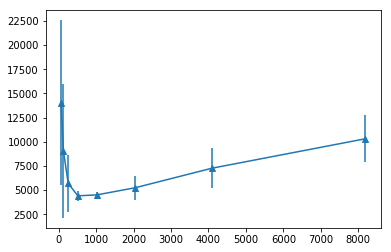

In [94]:
#### Variation with population size

template_pop_f = "maxtime20_pop{}_mr0.01_tour8_maxHeight2_cr1"
populations = [64, 128, 256, 512, 1024, 2048, 4096, 8192]

errorbar_plot(calc_means_and_stds(template_pop_f, populations))

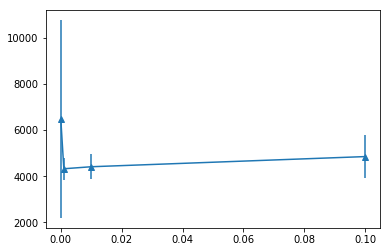

In [95]:
#### Variation with mutation rate

template_mr_f = "maxtime20_pop512_mr{}_tour8_maxHeight2_cr1"
mutation_rates = [0, 0.001, 0.01, 0.1]

errorbar_plot(calc_means_and_stds(template_mr_f, mutation_rates))

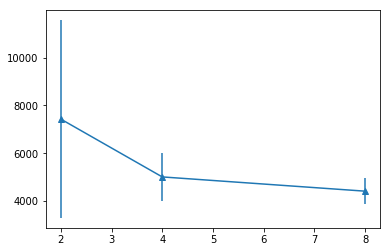

In [96]:
#### Variation with tour size

template_tour_f = "maxtime20_pop512_mr0.01_tour{}_maxHeight2_cr1"
tour_size = [2, 4, 8]

errorbar_plot(calc_means_and_stds(template_tour_f, tour_size))

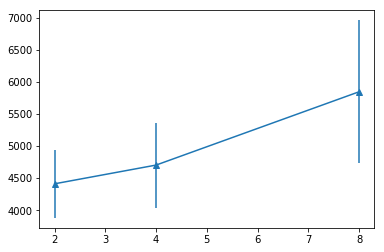

In [97]:
#### Variation with tour size

template_max_f = "maxtime20_pop512_mr0.01_tour8_maxHeight{}_cr1"
maxHeights = [2, 4, 8]

errorbar_plot(calc_means_and_stds(template_max_f, maxHeights))

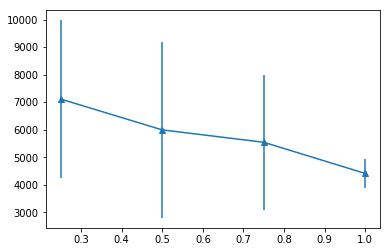

In [98]:
#### Variation with crossover rate

template_cr_f = "maxtime20_pop512_mr0.01_tour8_maxHeight2_cr{}"
crossoverRates = [0.25, 0.5, 0.75, 1] 

errorbar_plot(calc_means_and_stds(template_cr_f, crossoverRates))

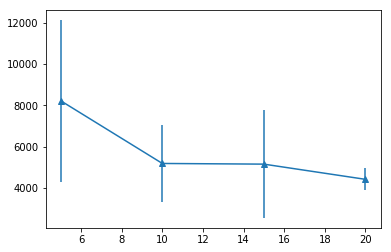

In [99]:
#### Variation with max time

template_mt_f = "maxtime{}_pop512_mr0.01_tour8_maxHeight2_cr1"
maxTime = [5, 10, 15, 20]

errorbar_plot(calc_means_and_stds(template_mt_f, maxTime))